In [1]:
%pip install streamlit

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached tenacity-8.5.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   --- ------------------------------------ 0.7/8.6 MB 23.8 MB/s eta 0:00:01
   ------- -------------------------------- 1.6/8.6 MB 21.0 MB/s eta 0:00:01
   ----------- ---------------------------- 2.4/8.6 MB 19.4 MB/s eta 0:00:01
   -------------- ------------------------- 3.2/8.6 MB 18.6 MB/s eta 0:00:01
   ------------------ --------------------- 3.9/8.6 MB 17.8 MB/s eta 0:00:01
   -------------------- ------------------- 4.4/8.6 MB 16.6 MB/s eta 0:00:01
   --------------------- ------------------ 4.6/8.6 MB 14.7 MB/s eta 0:00:01
   ----------------------- ---------------- 5.1/8.6 MB 14.2 MB/s eta 0:00:01
   -------------------------- ------------- 5.8/8.6 MB 14.1 MB

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("data/task1/train.csv")

# Separate features and target
X = data.drop(columns=['target'])
y = data['target']

In [6]:
data.describe

<bound method NDFrame.describe of        T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  \
0     -70 -61 -66 -53 -51 -63 -82 -57 -76  -78  -66  -66  -61  -59  -73  -75   
1     -77 -74 -71 -76 -65 -63 -66 -52 -55  -75  -72  -75  -74  -61  -64  -63   
2     -53 -38 -55 -66 -62 -62 -65 -70 -62  -52  -56  -53  -66  -68  -72  -60   
3     -72 -62 -59 -65 -65 -65 -78 -82 -83  -59  -84  -60  -64  -83  -69  -72   
4     -67 -69 -65 -63 -59 -53 -70 -72 -71  -60  -61  -57  -54  -76  -61  -66   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
36747 -68 -62 -64 -59 -59 -71 -67 -73 -73  -69  -71  -75  -56  -68  -68  -75   
36748 -56 -50 -57 -50 -59 -60 -62 -69 -58  -64  -49  -61  -58  -56  -60  -58   
36749 -42 -58 -72 -70 -75 -72 -76 -84 -84  -59  -65  -68  -65  -81  -86  -70   
36750 -50 -50 -70 -64 -64 -68 -68 -73 -79  -58  -61  -73  -67  -77  -73  -74   
36751 -66 -64 -70 -62 -59 -62 -53 -58 -64  -80  -73  -83  -67  -61  -56  -61   

     

In [11]:
data["target"].nunique(axis = 1)

160

## PCA graph

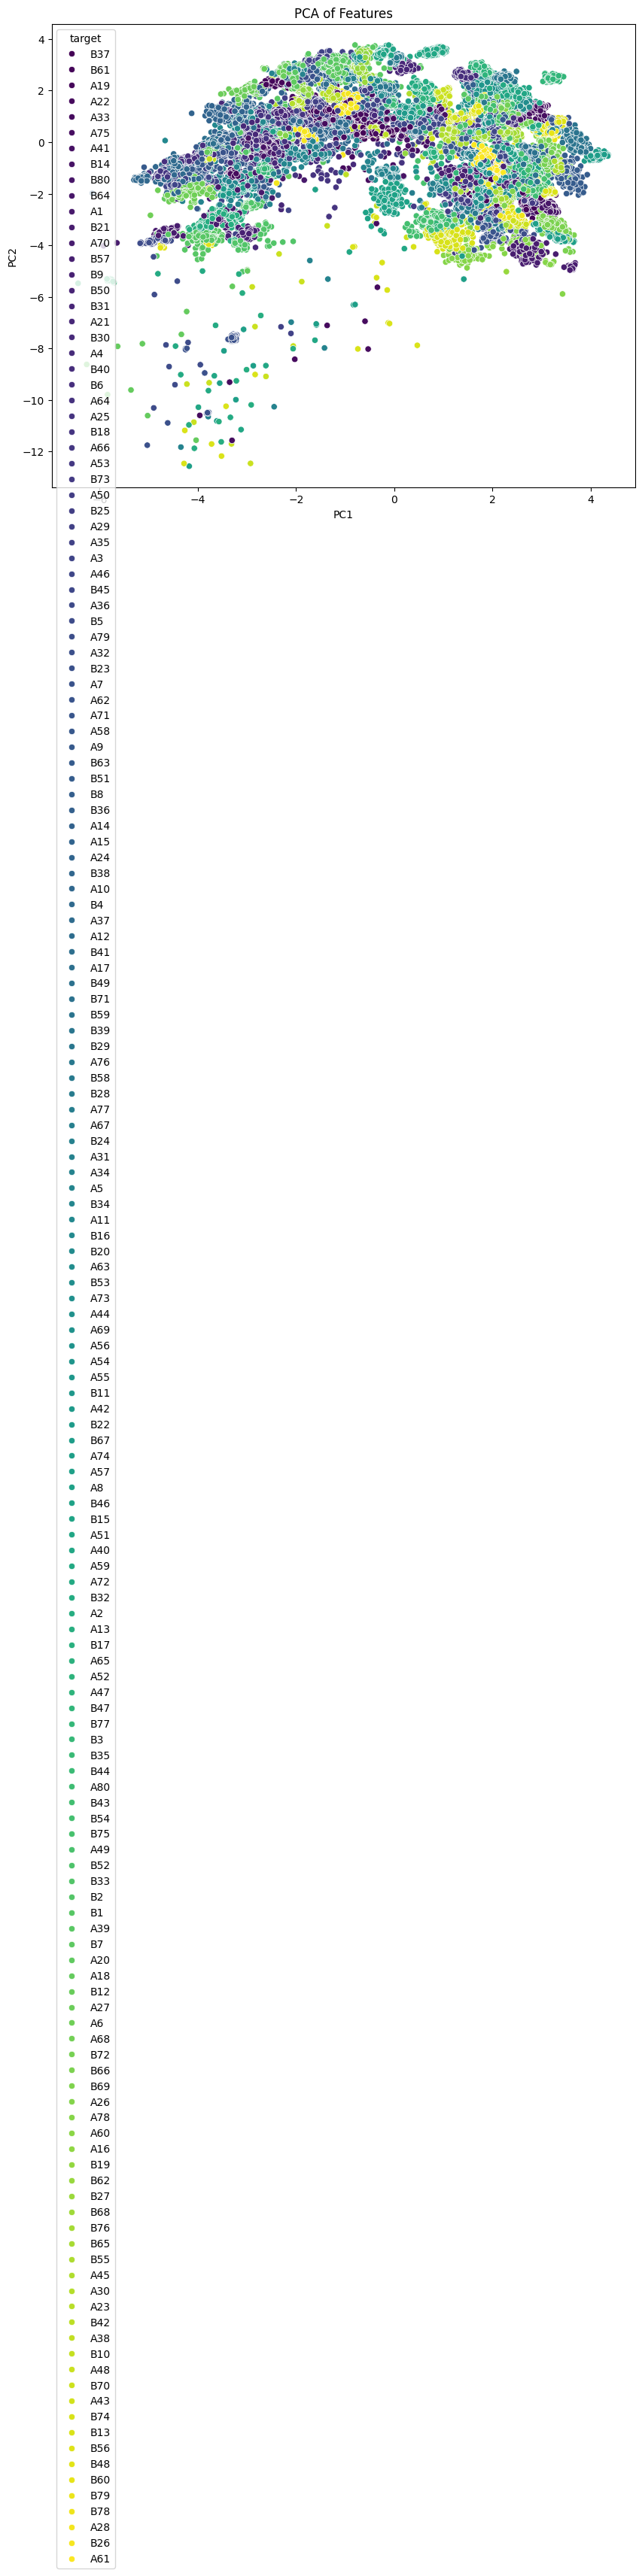

In [11]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pc_df['target'] = y

# Plot PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pc_df, palette='viridis')
plt.title('PCA of Features')
plt.show()


## Heatmap

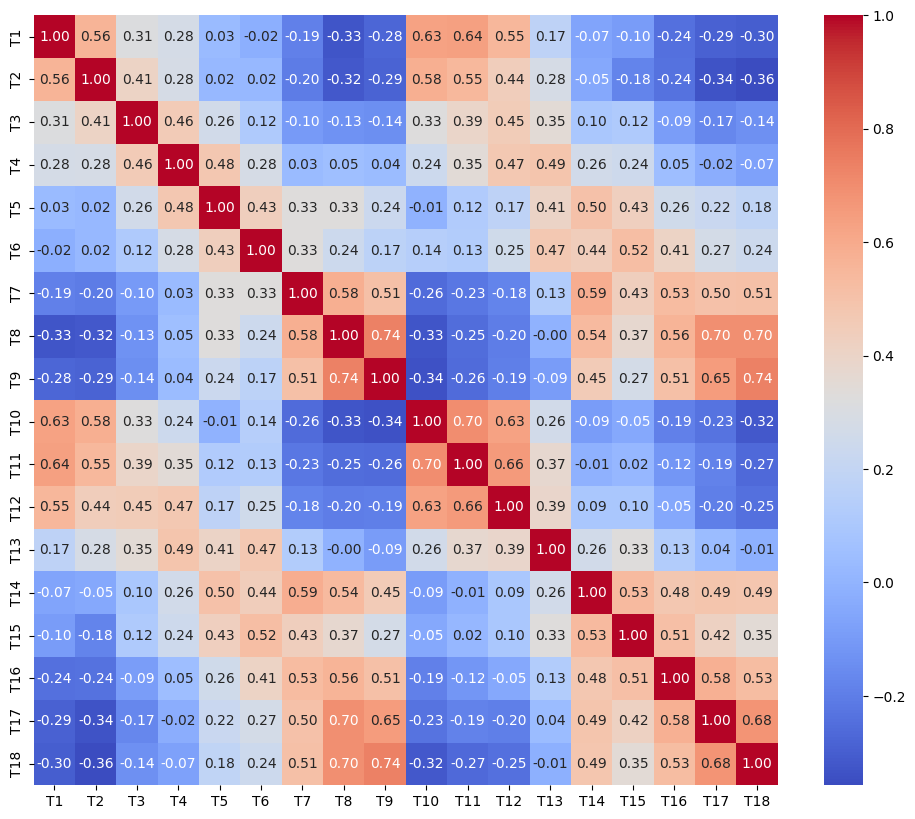

In [5]:
corr = X.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## Regression Model Training

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

# Convert string target values to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,train_size=0.2,random_state=42)

In [13]:
reg_model = LinearRegression().fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

In [14]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 20.967257176407468
Mean Squared Error: 735.1364511831064
R-squared: 0.6658978513626841


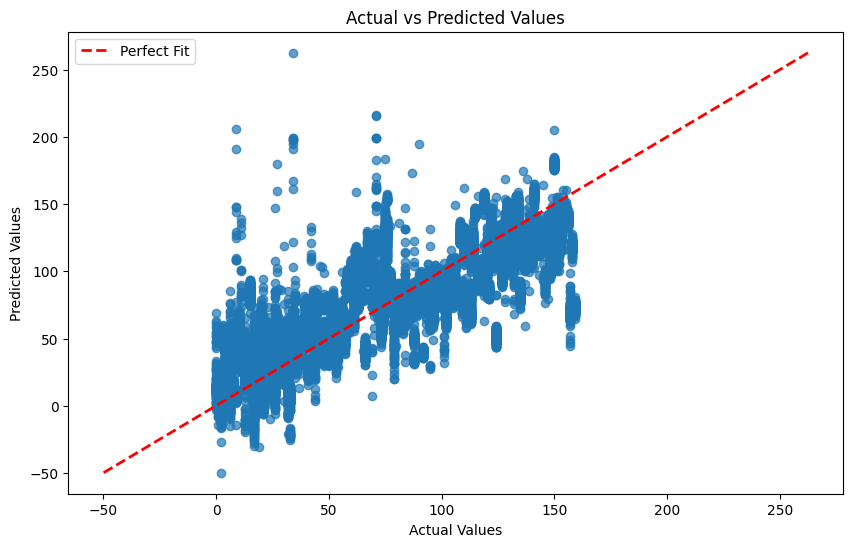

In [19]:
# Representation: Plot predicted vs actual values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
# Line for perfect predictions
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

### Random Forest model

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict using the model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error: {mae_rf}")
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")


Random Forest - Mean Absolute Error: 1.710910255538172
Random Forest - Mean Squared Error: 40.55277928233151
Random Forest - R-squared: 0.9815697199211972


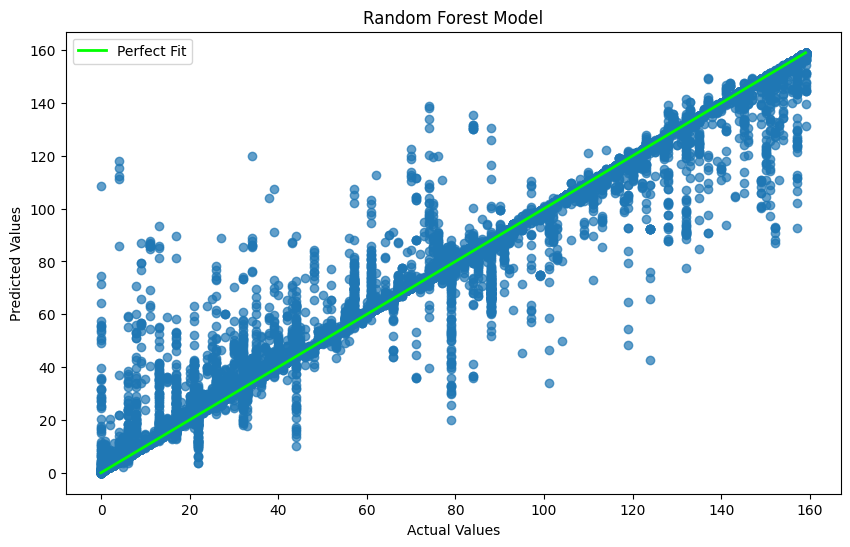

In [22]:
# Representation: Plot predicted vs actual values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
# Line for perfect predictions
min_val = min(min(y_test), min(y_pred_rf))
max_val = max(max(y_test), max(y_pred_rf))
plt.plot([min_val, max_val], [min_val, max_val], color='lime', linestyle='-', linewidth=2, label='Perfect Fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Model')
plt.legend()
plt.show()